# Reinforcement Learning based Trading Strategy

In this case study, you will learn how to combine reinforcement learning with time series modeling, in order to predict the prices of stocks, based on real-life data.


The focus of this notebook are as follows:
* Build a Trading strategy based on reinforcement learning from scratch.
* Train using the test data followed by testing.
* Evaluate Q-Learning Method of reinforcement learning which is a combination of policy and value based reinforcement learning. 
* Understand approaches to understand the reinfrocement learning algorithms and fine tune them.
* Class Structure of python programming. Mentioned step by step in the jupyter notebook.


## Content

* [1. Introduction](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1) 
* [5.Evaluate Algorithms and Models](#5)        
    * [5.1. Agent Script](#5.3)
    * [5.2. Helper Function](#5.4)
    * [5.3. Training Set](#5.5)       
* [6.Test Set](#6)           

<a id='0'></a>
# 1. Introduction

In this jupyter notebook, we will look at the Q-Learning Reinforcement Learning Techniques, along with an infused time series, to help us predict the best action, based on the stock prices. 

**Terminology**

* Agent: Reinforcement Learning object acting as a "bike re-balancing operator"
* Policy: agent's behaviour function, which is a map from state to action
* Value Function: a prediction of future rewards
* Model: agent's representation of the environment
* Environment: a bike station object that will provide feedback such as the number of bikes and reward / penalty
* State: the number of bike stock at a given time
* Training: interactions between the agent and environment for the agent to learn what the goal is and how to achieve it the best
* Episode: number of independent training session (the environment is reset, but agent keeps the learning from one episode to another).
* Session: each session has multiple episodes with both environment and agent reset; the goal is to benchmark agent performances based on the number of episodes (e.g. will more training episode leads to high success ratio? When should we stop the training?)
* Q-Table: a matrix the agent use to decide future action based on state-action-reward tuples; the agent develop this Q-Table from each training episode based on environment feedback

**ACTION**

* Hold: This means that based on the price and projected profit, the trader should hold a stock
* Sell: This means that based on the price and projected profit, the trader should sell a stock
* Buy: This means that based on the price and projected profit, the trader should buy a stock

**POLICY**

Q-learning is one of the most popular Reinforcement learning algorithms and lends itself much more readily for learning through implementation of toy problems as opposed to scouting through loads of papers and articles.

**ENVIRONMENT**

Stock Market 

**DATA**


The data that we will use will be the standard and poor's 500. According to Wikipedia, it is An American stock market index based on the market capitalizations of 500 large companies having common stock listed on the NYSE or NASDAQ. Here is a link to the data (https://ca.finance.yahoo.com/quote/%255EGSPC/history?p=%255EGSPC).


Points:
1) Set of actions - That can be seen by buy/sell list 
2) Order of the evenets in the code
3) Initial Capital
4) Test 0 two times
5) See the Flow
6) Compare against colab - chart

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime
import math
from numpy.random import choice
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Import Model Packages for reinforcement learning
from keras import layers, models, optimizers
from keras import backend as K
from collections import namedtuple, deque

Using TensorFlow backend.


<a id='1.2'></a>
## 2.2. Loading the Data

In [2]:
#The data already obtained from yahoo finance is imported.
dataset = read_csv('data/^GSPC.csv',index_col=0)

In [3]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
type(dataset)

pandas.core.frame.DataFrame

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [5]:
# shape
dataset.shape

(2515, 6)

In [6]:
# peek at data
set_option('display.width', 100)
dataset.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,1320.280029,1320.280029,1276.050049,1283.270020,1283.270020,1129400000
2001-01-03,1283.270020,1347.760010,1274.619995,1347.560059,1347.560059,1880700000
2001-01-04,1347.560059,1350.239990,1329.140015,1333.339966,1333.339966,2131000000
2001-01-05,1333.339966,1334.770020,1294.949951,1298.349976,1298.349976,1430800000
2001-01-08,1298.349976,1298.349976,1276.290039,1295.859985,1295.859985,1115500000


The data has the following columns:

* Date: This indicates the date under consideration

* Open: This indicates the price at which the market opens on the date

* High: This indicates the highest market price on the date

* Low: This indicates the lowest market price on the date

* Close: This indicates the price at which the market closes on the date, adjusted for the split

* Adj Close: This indicates the adjusted closing price for both the split and dividends

* Volume: This indicates the total volume of shares available

In [7]:
# describe data
set_option('precision', 3)
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2515.000,2515.000,2515.000,2515.000,2515.000,2.515e+03
mean,1158.443,1166.482,1149.707,1158.473,1158.473,2.822e+09
std,181.226,180.263,182.188,181.187,181.187,1.774e+09
min,679.280,695.270,666.790,676.530,676.530,3.561e+08
25%,1049.605,1058.805,1042.390,1049.985,1049.985,1.420e+09
50%,1154.050,1161.160,1144.940,1154.050,1154.050,2.153e+09
75%,1272.725,1280.355,1265.475,1272.875,1272.875,4.022e+09
max,1564.980,1576.090,1555.460,1565.150,1565.150,1.146e+10


<a id='3'></a>
## 4. Data Preparation

<a id='3.1'></a>
## 4.1. Data Cleaning
Check for the NAs in the rows, either drop them or fill them with the mean of the column

In [8]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = False


In case there are null values fill the missing values with the last value available in the dataset. 

In [9]:
# Fill the missing values with the last value available in the dataset. 
dataset=dataset.fillna(method='ffill')
dataset.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,1320.28,1320.28,1276.05,1283.27,1283.27,1129400000
2001-01-03,1283.27,1347.76,1274.62,1347.56,1347.56,1880700000


The parameters to clusters are the indices and the variables used in the clustering are the columns. Hence the data is in the right format to be fed to the clustering algorithms

<a id='4'></a>
# 5. Evaluate Algorithms and Models

We will look at the following Scripts :

1. Agent script
2. Helper Function

<a id='5.1'></a>
## 5.1. Q-Learning Agent

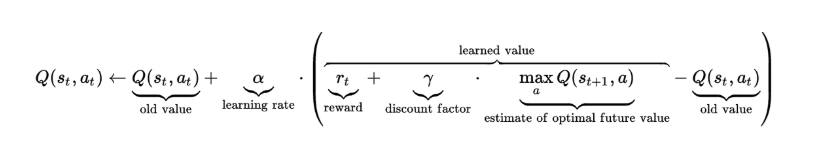

Now let’s go through the equation from left to right. When we take action at in state st, we update our value of Q(st,at) by adding a term to it. This term contains:
* Learning rate alpha: this is how aggressive we want to be when updating our value. When alpha is close to 0, we’re not updating very aggressively. When alpha is close to 1, we’re simply replacing the old value with the updated value.

* The reward is the reward we got by taking action at at state st. So we’re adding this reward to our old estimate.

* We’re also adding the estimated future reward, which is the maximum achievable reward Q for all available actions at xt+1.
* Finally, we subtract the old value of Q to make sure that we’re only incrementing or decrementing by the difference in the estimate (multiplied by alpha of course).

Now that we have a value estimate for each state-action pair, we can select which action to take according to our action-selection strategy (we don’t necessarily just choose the action that leads to the most expected reward every time

<a id='5.3'></a>
## 5.3. Agent script

In this section, we will train an agent that will perform reinforcement learning based on the Q-Learning. We will perform the following steps to achieve this:

* Create an agent class whose initial function takes in the batch size, state size, and an evaluation Boolean function, to check whether the training is ongoing.
* In the agent class, create the following methods:
* Create a Replay function that adds, samples, and evaluates a buffer.
* Add a new experience to the replay buffer memory
* Randomly sample a batch of experienced tuples from the memory. In the following function, we randomly sample states from a memory buffer. We do this so that the states that we feed to the model are not temporally correlated. This will reduce overfitting:
* Return the current size of the buffer memory
* The number of actions are defined as 3: sit, buy, sell
* Define the replay memory size
* Reward function is return 

In [1]:
class Agent:
    
    def __init__(
                     self, 
                     portfolio_size,
                     is_eval = False, 
                     allow_short = True,
                 ):
        
        self.portfolio_size = portfolio_size
        self.allow_short = allow_short
        self.input_shape = (portfolio_size, portfolio_size, )
        self.action_size = 3 # sit, buy, sell
        
        self.memory4replay = []
        self.is_eval = is_eval

        self.alpha = 0.5
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.99
        
        self.model = self._model()

    def _model(self):
        
        inputs = Input(shape=self.input_shape)        
        x = Flatten()(inputs)
        x = Dense(100, activation='elu')(x)
        x = Dropout(0.5)(x)
        x = Dense(50, activation='elu')(x)
        x = Dropout(0.5)(x)
        
        predictions = []
        for i in range(self.portfolio_size):
            asset_dense = Dense(self.action_size, activation='linear')(x)   
            predictions.append(asset_dense)
        
        model = Model(inputs=inputs, outputs=predictions)
        model.compile(optimizer='adam', loss='mse')
        return model

    def nn_pred_to_weights(self, pred, allow_short = False):

        weights = np.zeros(len(pred))
        raw_weights = np.argmax(pred, axis=-1)

        saved_min = None
        
        for e, r in enumerate(raw_weights):
            if r == 0: # sit
                weights[e] = 0
            elif r == 1: # buy
                weights[e] = np.abs(pred[e][0][r])
            else:
                weights[e] = -np.abs(pred[e][0][r])

        if not allow_short:
            weights += np.abs(np.min(weights))
            saved_min = np.abs(np.min(weights))
            saved_sum = np.sum(weights)
        else:
            saved_sum = np.sum(np.abs(weights))
            
        weights /= saved_sum
        return weights, saved_min, saved_sum
    
    def act(self, state):
        
        if not self.is_eval and random.random() <= self.epsilon:
            w = np.random.normal(0, 1, size = (self.portfolio_size, ))  
              
            saved_min = None
            
            if not self.allow_short:
                w += np.abs(np.min(w))
                saved_min = np.abs(np.min(w))
                
            saved_sum = np.sum(w)
            w /= saved_sum
            return w , saved_min, saved_sum

        pred = self.model.predict(np.expand_dims(state.values, 0))
        return self.nn_pred_to_weights(pred, self.allow_short)

    def expReplay(self, batch_size):

        def weights_to_nn_preds_with_reward(action_weights, 
                                            reward, 
                                            Q_star = np.zeros((self.portfolio_size, self.action_size))): 
            
            Q = np.zeros((self.portfolio_size, self.action_size))           
            for i in range(self.portfolio_size):
                if action_weights[i] == 0:
                    Q[i][0] = reward[i] + self.gamma * np.max(Q_star[i][0])
                elif action_weights[i] > 0:
                    Q[i][1] = reward[i] + self.gamma * np.max(Q_star[i][1])
                else:
                    Q[i][2] = reward[i] + self.gamma * np.max(Q_star[i][2])            
            return Q  
        
        def restore_Q_from_weights_and_stats(action):            
            action_weights, action_min, action_sum = action[0], action[1], action[2]
            action_weights = action_weights * action_sum          
            if action_min != None:
                action_weights = action_weights - action_min   
            return action_weights
        
        for (s, s_, action, reward, done) in self.memory4replay:
            
            action_weights = restore_Q_from_weights_and_stats(action) 
            Q_learned_value = weights_to_nn_preds_with_reward(action_weights, reward)
            s, s_ = s.values, s_.values    

            if not done:
                # reward + gamma * Q^*(s_, a_)
                Q_star = self.model.predict(np.expand_dims(s_, 0))
                Q_learned_value = weights_to_nn_preds_with_reward(action_weights, reward, np.squeeze(Q_star))  

            Q_learned_value = [xi.reshape(1, -1) for xi in Q_learned_value]
            Q_current_value = self.model.predict(np.expand_dims(s, 0))
            Q = [np.add(a * (1-self.alpha), q * self.alpha) for a, q in zip(Q_current_value, Q_learned_value)]
            
            # update current Q function with new optimal value
            self.model.fit(np.expand_dims(s, 0), Q, epochs=1, verbose=0)            
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay 

In [10]:
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.optimizers import Adam

import numpy as np
import random
from collections import deque

class Agent:
    def __init__(self, state_size, is_eval=False, model_name=""):
        self.state_size = state_size # normalized previous days
        self.action_size = 3 # sit, buy, sell
        self.memory = deque(maxlen=1000)
        self.inventory = []
        self.model_name = model_name
        self.is_eval = is_eval

        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995

        self.model = load_model("models/" + model_name) if is_eval else self._model()

    def _model(self):
        model = Sequential()
        model.add(Dense(units=64, input_dim=self.state_size, activation="relu"))
        model.add(Dense(units=32, activation="relu"))
        model.add(Dense(units=8, activation="relu"))
        model.add(Dense(self.action_size, activation="linear"))
        model.compile(loss="mse", optimizer=Adam(lr=0.001))

        return model

    def act(self, state):
        if not self.is_eval and random.random() <= self.epsilon:
            return random.randrange(self.action_size)

        options = self.model.predict(state)
        return np.argmax(options[0])

    def expReplay(self, batch_size):
        mini_batch = []
        l = len(self.memory)
        for i in range(l - batch_size + 1, l):
            mini_batch.append(self.memory[i])

        for state, action, reward, next_state, done in mini_batch:
            target = reward
            if not done:
                target = reward + self.gamma * np.amax(self.model.predict(next_state)[0])

            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay 

<a id='5.5'></a>
## 5.5. Helper Functions

In [11]:
import numpy as np
import math

# prints formatted price
def formatPrice(n):
    return ("-$" if n < 0 else "$") + "{0:.2f}".format(abs(n))

# returns the vector containing stock data from a fixed file
def getStockData(key):
    vec = []
    lines = open("data/" + key + ".csv", "r").read().splitlines()

    for line in lines[1:]:
        vec.append(float(line.split(",")[4]))

    return vec

# returns the sigmoid
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# returns an an n-day state representation ending at time t
def getState(data, t, n):
    d = t - n + 1
    block = data[d:t + 1] if d >= 0 else -d * [data[0]] + data[0:t + 1] # pad with t0
    res = []
    for i in range(n - 1):
        res.append(sigmoid(block[i + 1] - block[i]))

    return np.array([res])

<a id='5.6'></a>
## 5.6. Training the data

We will proceed to train the data, based on our agent and helper methods. This will provide us with one of three actions, based on the states of the stock prices at the end of the day. These states can be to buy, sell, or hold. During training, the prescribed action for each day is predicted, and the price (profit, loss, or unchanged) of the action is calculated. The cumulative sum will be calculated at the end of the training period, and we will see whether there has been a profit or a loss. The aim is to maximize the total profit.

Steps: 
* Define the number of market days to consider as the window size and define the batch size with which the neural network will be trained.
* Instantiate the stock agent with the window size and batch size.
* Read the training data from the CSV file, using the helper function.
* The episode count is defined as 10. The agent will look at the data for so many numbers of times. An episode represents a complete pass over the data.
* We can start to iterate through the episodes.
* Each episode has to be started with a state based on the data and window size. The inventory of stocks is initialized before going through the data.
* **Start to iterate over every day of the stock data. The action probability is predicted by the agent**
* Action can be held, if the agent decides not to do anything with the stock. Another possible action is to buy (hence, the stock will be added to the inventory).
* If the action is 2, the agent sells the stocks and removes it from the inventory. Based on the sale, the profit (or loss) is calculated.
        


In [12]:
window_size = 50
agent = Agent(window_size)
data = getStockData("^GSPC")
l = len(data) - 1
batch_size = 32

episode_count = 1

for e in range(episode_count + 1):
    print("Episode " + str(e) + "/" + str(episode_count))
    state = getState(data, 0, window_size + 1)

    total_profit = 0
    agent.inventory = []

    for t in range(l):
        action = agent.act(state) #return action depending on the state. 

        # sit
        next_state = getState(data, t + 1, window_size + 1)
        reward = 0

        if action == 1: # buy
            agent.inventory.append(data[t])
            print("Buy: " + formatPrice(data[t]))

        elif action == 2 and len(agent.inventory) > 0: # sell
            bought_price = agent.inventory.pop(0)
            reward = max(data[t] - bought_price, 0)
            total_profit += data[t] - bought_price
            print("Sell: " + formatPrice(data[t]) + " | Profit: " + formatPrice(data[t] - bought_price))

        done = True if t == l - 1 else False
        agent.memory.append((state, action, reward, next_state, done))
        state = next_state

        if done:
            print("--------------------------------")
            print("Total Profit: " + formatPrice(total_profit))
            print("--------------------------------")

        if len(agent.memory) > batch_size:
            agent.expReplay(batch_size)

    if e % 10 == 0:
        agent.model.save("models/model_ep" + str(e))

Instructions for updating:
Colocations handled automatically by placer.
Episode 0/1
Buy: $1283.27
Buy: $1347.56
Buy: $1333.34
Sell: $1298.35 | Profit: $15.08
Sell: $1300.80 | Profit: -$46.76
Sell: $1313.27 | Profit: -$20.07
Buy: $1342.54
Buy: $1342.90
Buy: $1360.40
Sell: $1364.30 | Profit: $21.76
Sell: $1357.51 | Profit: $14.61
Buy: $1354.95
Buy: $1364.17
Sell: $1373.73 | Profit: $13.33
Sell: $1354.31 | Profit: -$0.64
Buy: $1352.26
Buy: $1332.53
Sell: $1330.31 | Profit: -$33.86
Sell: $1315.92 | Profit: -$36.34
Buy: $1326.61
Buy: $1301.53
Instructions for updating:
Use tf.cast instead.
Buy: $1278.94
Buy: $1252.82
Buy: $1245.86
Sell: $1257.94 | Profit: -$74.59
Buy: $1264.74
Buy: $1233.42
Sell: $1180.16 | Profit: -$146.45
Sell: $1197.66 | Profit: -$103.87
Sell: $1173.56 | Profit: -$105.38
Sell: $1170.81 | Profit: -$82.01
Sell: $1122.14 | Profit: -$123.72
Sell: $1117.58 | Profit: -$147.16
Buy: $1139.83
Buy: $1152.69
Sell: $1182.17 | Profit: -$51.25
Sell: $1147.95 | Profit: $8.12
Buy: $1103

Sell: $976.22 | Profit: $28.13
Sell: $974.50 | Profit: $20.51
Sell: $982.32 | Profit: -$6.71
Sell: $993.75 | Profit: $16.77
Sell: $985.70 | Profit: $32.87
Sell: $1004.42 | Profit: $83.95
Sell: $1007.84 | Profit: $80.47
Sell: $1002.21 | Profit: $80.82
Sell: $988.70 | Profit: $70.77
Sell: $998.14 | Profit: $97.20
Sell: $1003.86 | Profit: $97.82
Sell: $1000.42 | Profit: $118.86
Sell: $994.09 | Profit: $146.34
Sell: $981.73 | Profit: $161.88
Sell: $993.32 | Profit: $195.62
Sell: $978.80 | Profit: $135.37
Sell: $988.11 | Profit: $149.43
Sell: $988.61 | Profit: $135.77
Sell: $981.60 | Profit: $78.82
Sell: $996.52 | Profit: $111.86
Sell: $989.28 | Profit: $125.04
Sell: $987.49 | Profit: $152.89
Sell: $990.31 | Profit: $130.74
Sell: $980.15 | Profit: $103.38
Sell: $982.82 | Profit: $77.36
Sell: $965.46 | Profit: $56.82
Sell: $967.08 | Profit: $63.28
Sell: $974.12 | Profit: $89.91
Sell: $977.59 | Profit: $57.97
Sell: $980.59 | Profit: $50.34
Sell: $990.35 | Profit: $61.58
Sell: $984.03 | Profit

Buy: $1127.24
Buy: $1125.81
Sell: $1121.64 | Profit: -$5.60
Sell: $1127.79 | Profit: $1.98
Buy: $1165.32
Buy: $1169.77
Sell: $1184.71 | Profit: $19.39
Sell: $1165.90 | Profit: -$3.87
--------------------------------
Total Profit: $12525.46
--------------------------------
Episode 1/1
Buy: $1239.94
Sell: $1241.23 | Profit: $1.29
Buy: $1122.14
Sell: $1117.58 | Profit: -$4.56
Buy: $1267.93
Buy: $1248.08
Sell: $1255.82 | Profit: -$12.11
Sell: $1260.67 | Profit: $12.59
Buy: $1069.63
Buy: $1071.38
Sell: $1062.44 | Profit: -$7.19
Sell: $1056.75 | Profit: -$14.63
Buy: $1139.93
Buy: $1136.76
Sell: $1137.07 | Profit: -$2.86
Sell: $1119.38 | Profit: -$17.38
Buy: $1083.51
Buy: $1080.17
Sell: $1096.22 | Profit: $12.71
Sell: $1111.94 | Profit: $31.77
Buy: $878.02
Buy: $893.40
Sell: $879.15 | Profit: $1.13
Sell: $893.92 | Profit: $0.52
Buy: $882.95
Buy: $882.53
Sell: $904.27 | Profit: $21.32
Sell: $909.83 | Profit: $27.30
Buy: $908.59
Sell: $929.01 | Profit: $20.42
Buy: $874.74
Sell: $869.95 | Profit

<a id='6'></a>
# 6. Testing the Data 

After training the data, it is tested it against the test dataset. Our model resulted in a total profit. The best thing about the model was that the profits kept improving over time, indicating that it was learning well and taking better actions.

In [16]:
#agent is already defined in the training set above.
test_data = getStockData("^GSPC_2011")
l_test = len(test_data) - 1
state = getState(test_data, 0, window_size + 1)
total_profit = 0
agent.inventory = []
agent.is_eval = False
done = False
for t in range(l_test):
    action = agent.act(state)

    next_state = getState(test_data, t + 1, window_size + 1)
    reward = 0

    if action == 1:

        agent.inventory.append(test_data[t])
        print("Buy: " + formatPrice(test_data[t]))

    elif action == 2 and len(agent.inventory) > 0:
        bought_price = agent.inventory.pop(0)
        reward = max(test_data[t] - bought_price, 0)
        total_profit += test_data[t] - bought_price
        print("Sell: " + formatPrice(test_data[t]) + " | profit: " + formatPrice(test_data[t] - bought_price))

    if t == l_test - 1:
        done = True
    agent.memory.append((state, action, reward, next_state, done))
    state = next_state

    if done:
        print("------------------------------------------")
        print("Total Profit: " + formatPrice(total_profit))
        print("------------------------------------------")

Buy: $1293.24
Sell: $1295.02 | profit: $1.78
------------------------------------------
Total Profit: $1.78
------------------------------------------


**Conclusion**

The model resulted in a total profit of $10427.24. The best thing about the model was that the profits kept improving over time, indicating that it was learning well and taking better actions.